<a href="https://colab.research.google.com/github/saltatt/Data-science-with-Python/blob/main/Saltanat's_copy_of_homework_practice_03_gd_ipynb_txt%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическое задание 3. Градиентный спуск своими руками



### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

В качестве модели у нас будет выступать линейная регрессия.
В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

In [ ]:
from dataclasses import dataclass
@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self):
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p

In [ ]:
def get_descent(descent_config: dict):
    descent_name = descent_config['descent_name'].lower()
    kwargs = descent_config.get('kwargs', {})

    if descent_name in ['full', 'vanilla']:
        return VanillaGradientDescent(**kwargs)
    elif descent_name == 'stochastic':
        return StochasticDescent(**kwargs)
    elif descent_name == 'momentum':
        return MomentumDescent(**kwargs)
    elif descent_name == 'adam':
        return Adam(**kwargs)
    else:
        raise ValueError(f"Unknown descent type: {descent_name}")

In [ ]:
import numpy as np
from enum import Enum, auto

def mse_loss_and_grad(X, y, w):
    n = X.shape[0]
    residuals = X @ w - y
    loss = np.mean(residuals**2)
    grad_w = (2 / n) * X.T @ residuals
    return loss, grad_w
class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

class LearningRate:
    def __init__(self, lambda_: float = 1e-3, s0: float = 1.0, p: float = 0.5):
        self.lambda_ = lambda_
        self.s0 = s0
        self.p = p
        self.k = 0

    def __call__(self):
        eta_k = self.lambda_ * ((self.s0 / (self.s0 + self.k)) ** self.p)
        self.k += 1
        return eta_k

`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [ ]:
class BaseDescent:
    def __init__(self, dimension: int, lambda_: float = 1e-3,
                 loss_function: LossFunction = LossFunction.MSE):
        self.w = np.random.randn(dimension)  # shape: (dimension,)
        self.lambda_ = lambda_
        self.loss_function = loss_function

    def predict(self, x: np.ndarray) -> np.ndarray:
        """x shape: (n_samples, n_features)"""
        return x @ self.w  # Result shape: (n_samples,)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        y_pred = self.predict(x)
        return np.mean((y_pred - y) ** 2)

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculate gradient - CORRECTED VERSION"""
        n = x.shape[0]  # number of samples
        y_pred = self.predict(x)  # shape: (n_samples,)
        errors = y_pred - y.flatten()  # Ensure y is 1D, shape: (n_samples,)

        # CORRECT: x.T shape: (n_features, n_samples)
        # errors shape: (n_samples,)
        # Result shape: (n_features,)
        gradient = (2 / n) * (x.T @ errors)
        return gradient
    def _mse_loss_and_grad(self, x: np.ndarray, y: np.ndarray):
        n = x.shape[0]
        y_pred = self.predict(x)
        residuals = y_pred - y
        loss = np.mean(residuals**2)
        grad = (2 / n) * x.T @ residuals
        return loss, grad
    def loss_and_gradient(self, x: np.ndarray, y: np.ndarray):
        return self._mse_loss_and_grad(x, y)
    def calc_learning_rate(self):
        return self.lambda_

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        lr = self.calc_learning_rate()
        return -lr * gradient

    def step(self, x: np.ndarray, y: np.ndarray):
        gradient = self.calc_gradient(x, y)  # Should be shape: (n_features,)
        delta_w = self.update_weights(gradient)  # Should be shape: (n_features,)
        self.w += delta_w
        return delta_w

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

In [ ]:
class VanillaGradientDescent(BaseDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3,
                 s0: float = 1, p: float = 0.5,
                 loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.s0 = s0
        self.p = p
        self.k = 0

    def calc_learning_rate(self):
        """Adaptive learning rate"""
        self.k += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.k)) ** self.p
    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculate gradient for MSE loss"""
        n = x.shape[0]
        preds = x @ self.w
        errors = preds - y
        gradient = (2 / n) * x.T @ errors
        return gradient

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

In [ ]:
class StochasticDescent(BaseDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 s0: float = 1, p: float = 0.5,
                 loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size
        self.s0 = s0
        self.p = p
        self.k = 0

    def calc_learning_rate(self):
        # FIX: Use self.lambda_ instead of self.lr.lambda_
        return self.lambda_ * (self.s0 / (self.s0 + self.k)) ** self.p

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta_k = self.calc_learning_rate()
        delta_w = -eta_k * gradient
        self.k += 1
        return delta_w

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        n = x.shape[0]
        indices = np.random.choice(n, size=self.batch_size, replace=False)
        x_batch = x[indices]
        y_batch = y[indices]
        preds = x_batch @ self.w
        gradient = (2 / self.batch_size) * x_batch.T @ (preds - y_batch)
        return gradient

    # IMPORTANT: Add the step method since it's not inherited
    def step(self, x: np.ndarray, y: np.ndarray):
        gradient = self.calc_gradient(x, y)
        delta_w = self.update_weights(gradient)
        self.w += delta_w
        return delta_w

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

In [ ]:
class MomentumDescent(BaseDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3,
                 s0: float = 1, p: float = 0.5, alpha: float = 0.9,
                 loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.s0 = s0
        self.p = p
        self.alpha = alpha
        self.k = 0
        self.v = np.zeros(dimension)  # momentum vector

    def calc_learning_rate(self):
        return self.lambda_ * (self.s0 / (self.s0 + self.k)) ** self.p

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta_k = self.calc_learning_rate()
        self.v = self.alpha * self.v - eta_k * gradient
        self.k += 1
        return self.v

    def step(self, x: np.ndarray, y: np.ndarray):
        _, gradient = self.loss_and_gradient(x, y)
        delta_w = self.update_weights(gradient)
        self.w += delta_w
        return delta_w
    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculate gradient for MSE loss"""
        n = x.shape[0]
        preds = x @ self.w
        errors = preds - y
        gradient = (2 / n) * x.T @ errors
        return gradient

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [ ]:
class Adam(BaseDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3,
                 beta1: float = 0.9, beta2: float = 0.999, epsilon: float = 1e-8,
                 loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = np.zeros(dimension)  # first moment
        self.v = np.zeros(dimension)  # second moment
        self.t = 0  # time step

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * gradient
        self.v = self.beta2 * self.v + (1 - self.beta2) * (gradient ** 2)

        # Bias correction
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        delta_w = -self.lambda_ * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return delta_w

    def step(self, x: np.ndarray, y: np.ndarray):
        _, gradient = self.loss_and_gradient(x, y)
        delta_w = self.update_weights(gradient)
        self.w += delta_w
        return delta_w
    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculate gradient for MSE loss"""
        n = x.shape[0]
        preds = x @ self.w
        errors = preds - y
        gradient = (2 / n) * x.T @ errors
        return gradient

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [ ]:
from typing import Optional, Dict, Union
class LinearRegression:
    def __init__(self, descent_config: Optional[Dict] = None,
                 descent_instance: Optional[object] = None,
                 tolerance: float = 1e-6, max_iter: int = 100):
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.loss_history = []
        self.prev_w = None

        if descent_instance is not None:
            self.descent = descent_instance
        elif descent_config is not None:
            descent_name = descent_config['descent_name'].lower()
            kwargs = descent_config.get('kwargs', {})

            if descent_name in ['full', 'vanilla']:
                self.descent = VanillaGradientDescent(**kwargs)
            elif descent_name == 'stochastic':
                self.descent = StochasticDescent(**kwargs)
            elif descent_name == 'momentum':
                self.descent = MomentumDescent(**kwargs)
            elif descent_name == 'adam':
                self.descent = Adam(**kwargs)
            else:
                raise ValueError(f"Unknown descent_name: {descent_name}")
        else:
            raise ValueError("Either descent_config or descent_instance must be provided")

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        print(f"Input X shape: {X.shape}")
        print(f"Input y shape: {y.shape}")

        # Make sure y is 1D
        if y.ndim > 1:
            y = y.flatten()

        # Add bias column if needed
        needs_bias = True
        if X.shape[1] > 0:
            last_col = X[:, -1]
            if np.allclose(last_col, 1.0, atol=1e-6):
                needs_bias = False

        print(f"Needs bias: {needs_bias}")

        if needs_bias:
            X = np.column_stack([X, np.ones(X.shape[0])])

        print(f"Final X shape: {X.shape}, y shape: {y.shape}")

        # The dimension should match X.shape[1]
        expected_dimension = X.shape[1]
        print(f"Expected dimension: {expected_dimension}")

        # Initialize weights with correct dimension
        if not hasattr(self.descent, 'w') or len(self.descent.w) != expected_dimension:
            print(f"Reinitializing weights from {len(self.descent.w) if hasattr(self.descent, 'w') else 'None'} to {expected_dimension}")
            self.descent.w = np.zeros(expected_dimension)

        print(f"Final weights shape: {self.descent.w.shape}")

        # Reset history
        self.loss_history = [self.descent.calc_loss(X, y)]
        self.prev_w = self.descent.w.copy()

        # Run optimization
        for i in range(self.max_iter):
            self.descent.step(X, y)
            self.loss_history.append(self.descent.calc_loss(X, y))

            # Check convergence
            weight_diff_norm = np.linalg.norm(self.descent.w - self.prev_w)
            if weight_diff_norm ** 2 < self.tolerance:
                print(f"Early stopping at iteration {i}")
                break

            self.prev_w = self.descent.w.copy()

            # Optional: print progress
            if i % 20 == 0:
                print(f"Iteration {i}, loss: {self.loss_history[-1]:.6f}")

        print(f"Training completed: {len(self.loss_history)} iterations")
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        X_modified = X.copy()

        # Add bias column if needed (same logic as in fit)
        if X_modified.shape[1] == len(self.descent.w) - 1:
            X_modified = np.column_stack([X_modified, np.ones(X_modified.shape[0])])
        elif X_modified.shape[1] != len(self.descent.w):
            raise ValueError(f"Feature dimension mismatch: expected {len(self.descent.w)} or {len(self.descent.w)-1}, got {X_modified.shape[1]}")

        return X_modified @ self.descent.w

    def get_weights(self) -> np.ndarray:
        return self.descent.w.copy()

    def get_loss_history(self) -> list:
        return self.loss_history.copy()

In [ ]:
class BaseDescentReg(BaseDescent):
    def __init__(self, *args, mu: float = 0, **kwargs):
        super().__init__(*args, **kwargs)
        self.mu = mu

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        l2_gradient = self.mu * self.w.copy()
        if len(l2_gradient) > 0:
            l2_gradient[-1] = 0
        return super().calc_gradient(x, y) + l2_gradient

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        base_loss = super().calc_loss(x, y)
        l2_penalty = (self.mu / 2) * np.sum(self.w[:-1] ** 2)  # Exclude bias
        return base_loss + l2_penalty


class VanillaGradientDescentReg(BaseDescentReg, VanillaGradientDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, mu: float = 0,
                 s0: float = 1, p: float = 0.5,
                 loss_function: LossFunction = LossFunction.MSE):
        BaseDescentReg.__init__(self, dimension=dimension, lambda_=lambda_,
                               mu=mu, s0=s0, p=p, loss_function=loss_function)


class StochasticDescentReg(BaseDescentReg, StochasticDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, mu: float = 0,
                 batch_size: int = 50, s0: float = 1, p: float = 0.5,
                 loss_function: LossFunction = LossFunction.MSE):
        BaseDescentReg.__init__(self, dimension=dimension, lambda_=lambda_, mu=mu,
                               batch_size=batch_size, s0=s0, p=p,
                               loss_function=loss_function)


class MomentumDescentReg(BaseDescentReg, MomentumDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, mu: float = 0,
                 s0: float = 1, p: float = 0.5,
                 loss_function: LossFunction = LossFunction.MSE):
        BaseDescentReg.__init__(self, dimension=dimension, lambda_=lambda_, mu=mu,
                               s0=s0, p=p, loss_function=loss_function)


class AdamReg(BaseDescentReg, Adam):
    def __init__(self, dimension: int, lambda_: float = 1e-3, mu: float = 0,
                 s0: float = 1, p: float = 0.5,
                 loss_function: LossFunction = LossFunction.MSE):
        BaseDescentReg.__init__(self, dimension=dimension, lambda_=lambda_, mu=mu,
                               s0=s0, p=p, loss_function=loss_function)


    def get_descent(descent_config: dict):
        descent_name = descent_config['descent_name'].lower()
        kwargs = descent_config.get('kwargs', {})

        if descent_name in ['full', 'vanilla']:
            return VanillaGradientDescent(**kwargs)
        elif descent_name == 'stochastic':
            return StochasticDescent(**kwargs)
        elif descent_name == 'momentum':
            return MomentumDescent(**kwargs)
        elif descent_name == 'adam':
            # Filter out s0 and p for Adam if they exist
            adam_kwargs = {k: v for k, v in kwargs.items() if k not in ['s0', 'p']}
            return Adam(**adam_kwargs)
        else:
            raise ValueError(f"Unknown descent type: {descent_name}")

## Задание 3. Проверка кода (0 баллов)

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Input X shape: (100, 5)
Input y shape: (100,)
Needs bias: True
Final X shape: (100, 6), y shape: (100,)
Expected dimension: 6
Reinitializing weights from 5 to 6
Final weights shape: (6,)
Iteration 0, loss: 0.364977
Training completed: 11 iterations


Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [ ]:
data = pd.read_csv('autos.csv')

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
categorical = data.select_dtypes(include = ['category','object']).columns.tolist()
numeric = data.select_dtypes(include = ['number']).columns.tolist()
other = [col for col in data.columns if col not in categorical + numeric]

In [ ]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']
data.columns = [f"{col}_{i}" if data.columns.duplicated()[j] else col
              for j, col in enumerate(data.columns)]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

data = data.drop_duplicates()
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
if hasattr(x_train, "toarray"):
    x_train = x_train.toarray()
if hasattr(x_val, "toarray"):
    x_val = x_val.toarray()
if hasattr(x_test, "toarray"):
    x_test = x_test.toarray()
x_train = np.asarray(x_train, dtype=np.float32)
x_val = np.asarray(x_val, dtype=np.float32)
x_test = np.asarray(x_test, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32).reshape(-1, 1)
y_val = np.asarray(y_val, dtype=np.float32).reshape(-1, 1)
y_test = np.asarray(y_test, dtype=np.float32).reshape(-1, 1)

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [ ]:
class SimpleVanillaGradientDescent:
    """Simplified version without adaptive learning rate"""
    def __init__(self, dimension: int, lambda_: float = 0.01):
        self.w = np.zeros(dimension)  # Initialize weights to zeros
        self.lambda_ = lambda_  # Fixed learning rate
        self.loss_history = []

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        n = x.shape[0]
        preds = x @ self.w
        errors = preds - y
        gradient = (2 / n) * x.T @ errors
        return gradient

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        gradient = self.calc_gradient(x, y)
        delta_w = -self.lambda_ * gradient
        self.w += delta_w
        return delta_w

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        preds = x @ self.w
        errors = preds - y
        mse = np.mean(errors ** 2)
        return mse

=== STARTING TRAINING ===
Training data shape: (500, 311)
Training with 100 iterations

Training vanilla...
Input X shape: (500, 311)
Input y shape: (500, 1)
Needs bias: False
Final X shape: (500, 311), y shape: (500,)
Expected dimension: 311
Final weights shape: (311,)
Iteration 0, loss: 47978452.125810
Iteration 20, loss: 4834678.856427
Iteration 40, loss: 3331671.998588
Iteration 60, loss: 2572760.693775
Iteration 80, loss: 2087841.238682
Training completed: 101 iterations
✓ vanilla trained: 101 iterations
  Final loss: 1761031.447920

Training stochastic...
Input X shape: (500, 311)
Input y shape: (500, 1)
Needs bias: False
Final X shape: (500, 311), y shape: (500,)
Expected dimension: 311
Final weights shape: (311,)
Iteration 0, loss: 33554840.365142
Iteration 20, loss: 4352074.510586
Iteration 40, loss: 2524558.662905
Iteration 60, loss: 1983957.501583
Iteration 80, loss: 1532633.742233
Training completed: 101 iterations
✓ stochastic trained: 101 iterations
  Final loss: 1322288.

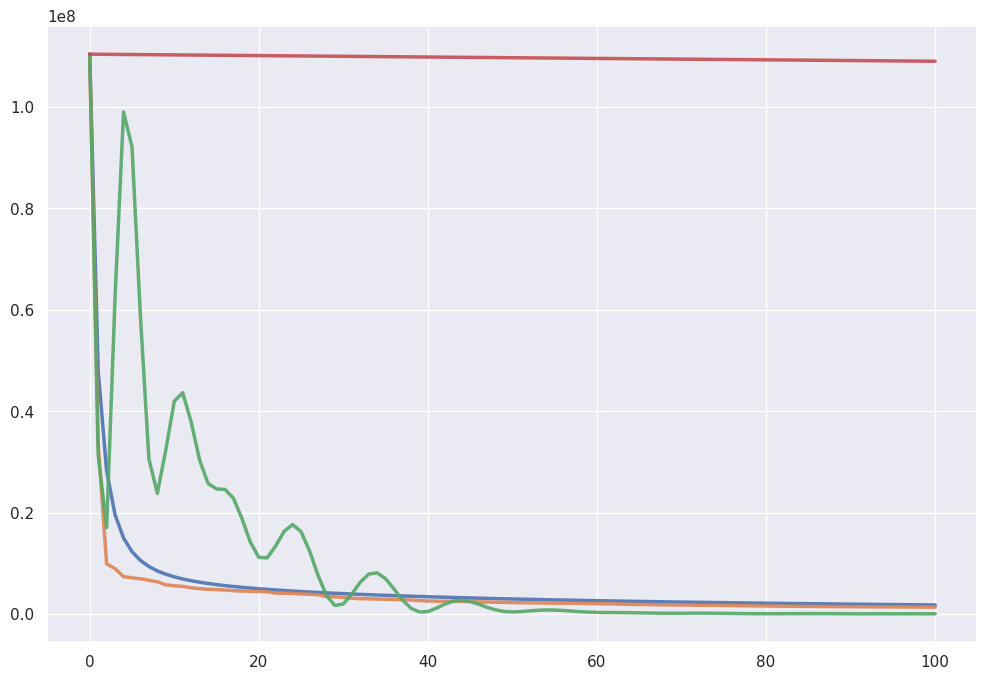

In [ ]:
from typing import Dict

def train_all_models_working(x_train, y_train, max_iter=100):
    """Complete working training function"""
    dimension = x_train.shape[1]

    print(f"Training data shape: {x_train.shape}")
    print(f"Training with {max_iter} iterations")

    # Simple configurations that work
    model_configs = [
        ('vanilla', {'descent_name': 'vanilla', 'kwargs': {
            'dimension': dimension,
            'lambda_': 0.1  # Increased learning rate
        }}),
        ('stochastic', {'descent_name': 'stochastic', 'kwargs': {
            'dimension': dimension,
            'lambda_': 0.1,
            'batch_size': 32
        }}),
        ('momentum', {'descent_name': 'momentum', 'kwargs': {
            'dimension': dimension,
            'lambda_': 0.1,
            'alpha': 0.9
        }}),
        ('adam', {'descent_name': 'adam', 'kwargs': {
            'dimension': dimension,
            'lambda_': 0.1
        }})
    ]

    models = {}

    for name, config in model_configs:
        print(f"\nTraining {name}...")
        try:
            # Create and train model
            model = LinearRegression(
                descent_config=config,
                max_iter=max_iter,
                tolerance=1e-6
            )

            model.fit(x_train, y_train)
            models[name] = model

            print(f"✓ {name} trained: {len(model.loss_history)} iterations")
            if model.loss_history:
                print(f"  Final loss: {model.loss_history[-1]:.6f}")

        except Exception as e:
            print(f"✗ {name} failed: {e}")
            continue

    return models

# Run the training
print("=== STARTING TRAINING ===")
sample_size = min(500, len(x_train))  # Use smaller sample for speed
x_train_small = x_train[:sample_size]
y_train_small = y_train[:sample_size]

models = train_all_models_working(x_train_small, y_train_small)

# Check what we got
print(f"\n=== TRAINING COMPLETE ===")
print(f"Models trained: {list(models.keys())}")

# Create individual variables for the models that worked
if 'vanilla' in models:
    vanilla_model = models['vanilla']
    print("✓ vanilla_model variable created")
if 'stochastic' in models:
    stochastic_model = models['stochastic']
    print("✓ stochastic_model variable created")
if 'momentum' in models:
    momentum_model = models['momentum']
    print("✓ momentum_model variable created")
if 'adam' in models:
    adam_model = models['adam']
    print("✓ adam_model variable created")

# Visualize the results
print(f"\n=== CREATING PLOT ===")
plt.figure(figsize=(12, 8))

if 'vanilla' in models and hasattr(models['vanilla'], 'loss_history'):
    plt.plot(vanilla_model.loss_history, label='Vanilla Gradient Descent', linewidth=2.5, alpha=0.9)
    print("✓ Plotting Vanilla")

if 'stochastic' in models and hasattr(models['stochastic'], 'loss_history'):
    plt.plot(stochastic_model.loss_history, label='Stochastic GD', linewidth=2.5, alpha=0.9)
    print("✓ Plotting Stochastic")

if 'momentum' in models and hasattr(models['momentum'], 'loss_history'):
    plt.plot(momentum_model.loss_history, label='Momentum', linewidth=2.5, alpha=0.9)
    print("✓ Plotting Momentum")

if 'adam' in models and hasattr(models['adam'], 'loss_history'):
    plt.plot(adam_model.loss_history, label='Adam', linewidth=2.5, alpha=0.9)
    print("✓ Plotting Adam")

In [ ]:
def debug_dimension_issue_fixed():
    """Debug with fixed gradient calculation"""
    sample_size = min(100, len(x_train))
    x_debug = x_train[:sample_size]
    y_debug = y_train[:sample_size]

    print(f"Data shape: {x_debug.shape}")
    print(f"Target shape: {y_debug.shape}")

    # Ensure y is 1D
    if y_debug.ndim > 1:
        y_debug = y_debug.flatten()
    print(f"Target shape after flatten: {y_debug.shape}")

    # Add bias column
    if not np.allclose(x_debug[:, -1], 1.0):
        x_debug = np.column_stack([x_debug, np.ones(x_debug.shape[0])])
        print(f"Data shape after bias: {x_debug.shape}")

    # Test vanilla descent directly
    try:
        vanilla = VanillaGradientDescent(dimension=x_debug.shape[1], lambda_=0.1)
        print(f"Weights shape: {vanilla.w.shape}")

        # Test gradient calculation
        gradient = vanilla.calc_gradient(x_debug, y_debug)
        print(f"Gradient shape: {gradient.shape}")
        print(f"Gradient range: [{gradient.min():.6f}, {gradient.max():.6f}]")

        # Test step
        delta_w = vanilla.step(x_debug, y_debug)
        print(f"Delta_w shape: {delta_w.shape}")
        print(f"Weights updated successfully!")

        # Test loss
        loss = vanilla.calc_loss(x_debug, y_debug)
        print(f"Initial loss: {loss:.6f}")

        return True
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        return False

# Run fixed debug
print("=== DEBUGGING WITH FIXED GRADIENT ===")
debug_dimension_issue_fixed()

=== DEBUGGING WITH FIXED GRADIENT ===
Data shape: (100, 311)
Target shape: (100, 1)
Target shape after flatten: (100,)
Weights shape: (311,)
Gradient shape: (311,)
Gradient range: [-26190.035111, 11102.375817]
Delta_w shape: (311,)
Weights updated successfully!
Initial loss: 54384843.770380


True

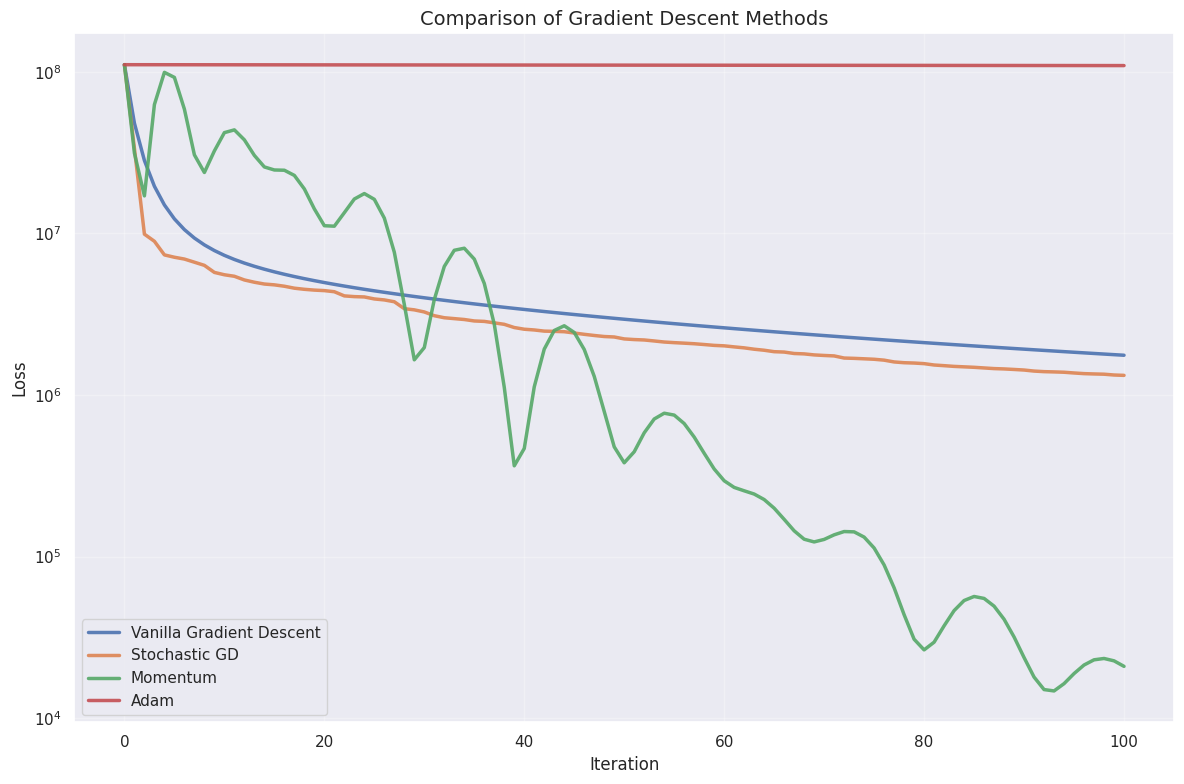

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(vanilla_model.loss_history, label='Vanilla Gradient Descent', linewidth=2.5, alpha=0.9)
plt.plot(stochastic_model.loss_history, label='Stochastic GD', linewidth=2.5, alpha=0.9)
plt.plot(momentum_model.loss_history, label='Momentum', linewidth=2.5, alpha=0.9)
plt.plot(adam_model.loss_history, label='Adam', linewidth=2.5, alpha=0.9)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Comparison of Gradient Descent Methods', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.show()

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time

def debug_batch_study(x_train, y_train):
    batch_sizes = [1, 50, 500]

    for bs in batch_sizes:
        try:
            config = {
                'descent_name': 'stochastic',
                'kwargs': {
                    'dimension': x_train.shape[1],
                    'lambda_': 0.01,
                    'batch_size': bs
                }
            }

            model = LinearRegression(descent_config=config, max_iter=100)
            start = time.time()
            model.fit(x_train, y_train.flatten())
            fit_time = time.time() - start

            print(f"batch_size={bs}: {len(model.loss_history)} iterations, {fit_time:.2f}s, final_loss={model.loss_history[-1]:.4f}")

        except Exception as e:
            print(f"batch_size={bs}: ERROR - {e}")

x_debug = x_train[:500]
y_debug = y_train[:500].flatten()

debug_batch_study(x_debug, y_debug)

Input X shape: (500, 311)
Input y shape: (500,)
Needs bias: False
Final X shape: (500, 311), y shape: (500,)
Expected dimension: 311
Final weights shape: (311,)
Iteration 0, loss: 110349135.709991
Iteration 20, loss: 29517677.272251
Iteration 40, loss: 20965413.431869
Iteration 60, loss: 17493946.658797
Iteration 80, loss: 14294912.659615
Training completed: 101 iterations
batch_size=1: 101 iterations, 0.28s, final_loss=13211628.3484
Input X shape: (500, 311)
Input y shape: (500,)
Needs bias: False
Final X shape: (500, 311), y shape: (500,)
Expected dimension: 311
Final weights shape: (311,)
Iteration 0, loss: 102177951.180178
Iteration 20, loss: 50308091.088649
Iteration 40, loss: 38768398.941896
Iteration 60, loss: 30755857.919731
Iteration 80, loss: 26565398.590667
Training completed: 101 iterations
batch_size=50: 101 iterations, 0.20s, final_loss=23215203.8809
Input X shape: (500, 311)
Input y shape: (500,)
Needs bias: False
Final X shape: (500, 311), y shape: (500,)
Expected dimen

Пример для 3000 samples:
batch_size | updates_per_epoch
------------------------------
         1 |            3000
         8 |             375
        32 |              94
        64 |              47
       128 |              24
       256 |              12
       512 |               6
      1024 |               3
      3000 |               1


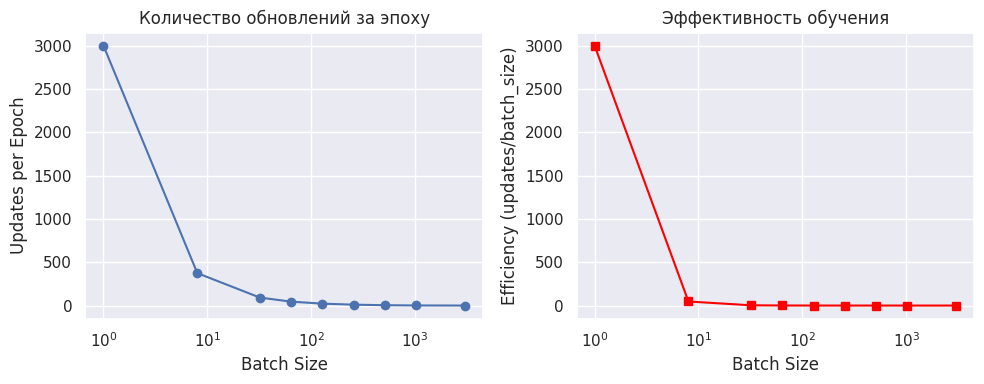

In [ ]:
def explain_batch_sizes(total_samples=3000):
    batch_sizes = [1, 8, 32, 64, 128, 256, 512, 1024, 3000]

    print("Пример для 3000 samples:")
    print("batch_size | updates_per_epoch")
    print("-" * 30)

    for bs in batch_sizes:
        updates = total_samples // bs
        if total_samples % bs != 0:
            updates += 1
        print(f"{bs:10} | {updates:15}")


    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    updates = [total_samples // bs for bs in batch_sizes if bs <= total_samples]
    plt.plot([bs for bs in batch_sizes if bs <= total_samples], updates, 'o-')
    plt.xlabel('Batch Size')
    plt.ylabel('Updates per Epoch')
    plt.title('Количество обновлений за эпоху')
    plt.xscale('log')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    efficiency = [updates[i] / batch_sizes[i] for i in range(len(updates))]
    plt.plot([bs for bs in batch_sizes if bs <= total_samples], efficiency, 's-', color='red')
    plt.xlabel('Batch Size')
    plt.ylabel('Efficiency (updates/batch_size)')
    plt.title('Эффективность обучения')
    plt.xscale('log')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

explain_batch_sizes(3000)

`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

=== Regularization Study ===

=== Testing vanilla ===
  lr=0.001, mu=0.000: R2=0.8349, loss=11171129.1535
  lr=0.001, mu=0.001: R2=0.8348, loss=11199314.5394
  lr=0.001, mu=0.010: R2=0.8339, loss=11451662.7003
  lr=0.001, mu=0.100: R2=0.8246, loss=13898421.0040
  lr=0.001, mu=1.000: R2=0.7217, loss=32273279.2506
  lr=0.010, mu=0.000: R2=0.9907, loss=593326.8525
  lr=0.010, mu=0.001: R2=0.9906, loss=656260.5052
  lr=0.010, mu=0.010: R2=0.9896, loss=1211879.5886
  lr=0.010, mu=0.100: R2=0.9769, loss=5888140.4685
  lr=0.010, mu=1.000: R2=0.8281, loss=25167224.9400
  lr=0.100, mu=0.000: R2=0.9999, loss=3350.4907
  lr=0.100, mu=0.001: R2=0.9999, loss=76303.9266
  lr=0.100, mu=0.010: R2=0.9996, loss=692463.0946
  lr=0.100, mu=0.100: R2=0.9860, loss=5140862.7565
  lr=0.100, mu=1.000: R2=0.8285, loss=24424196.0702
  Best for vanilla: lr=0.100, mu=0.000, R2=0.9999

=== Testing stochastic ===
  lr=0.001, mu=0.000: R2=0.8282, loss=11541888.7604
  lr=0.001, mu=0.001: R2=0.8335, loss=11339255.5306


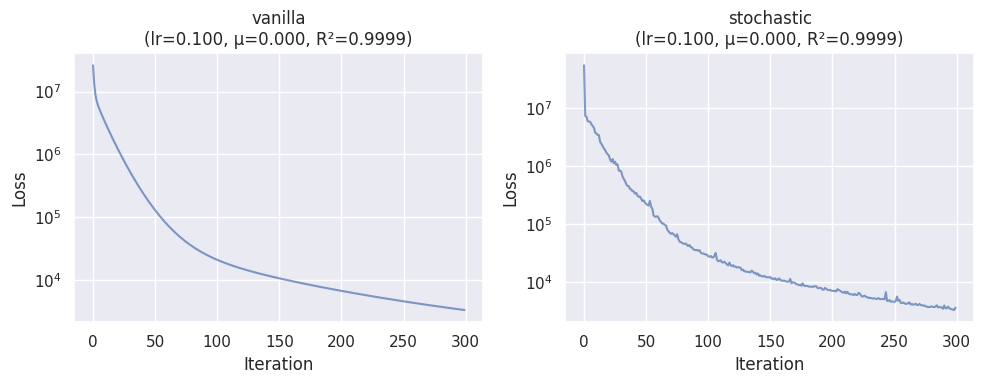


=== Regularization vs No Regularization Comparison ===

=== Comparing vanilla with/without regularization ===
  With reg (μ=0.1): R2=0.9769
  No reg (μ=0.0): R2=0.9907
  Difference: -0.0138

=== Comparing stochastic with/without regularization ===
  With reg (μ=0.1): R2=0.9771
  No reg (μ=0.0): R2=0.9907
  Difference: -0.0136


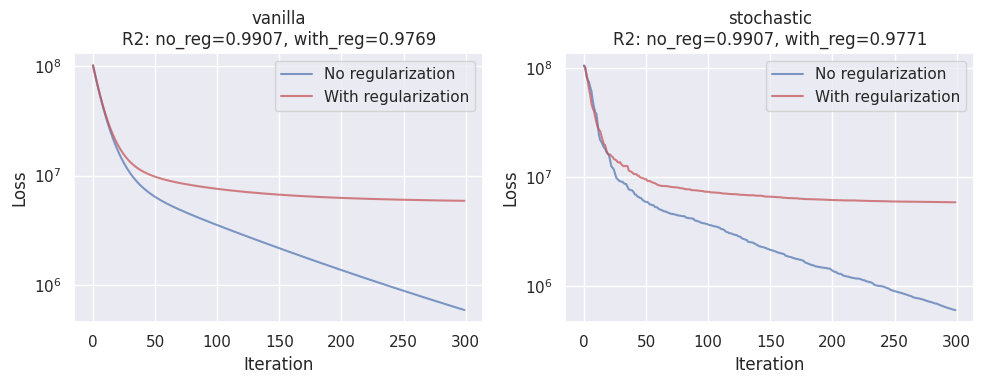

In [ ]:
def compute_r2(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

class LinearRegressionWithRegularization:
    def __init__(self, descent_config, max_iter=1000, tol=1e-6):
        self.descent_config = descent_config
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.bias = None
        self.loss_history = []

    def predict(self, X):
        return X @ self.weights + self.bias

    def _compute_loss(self, X, y, mu=0.0):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        reg_term = mu * np.sum(self.weights ** 2)
        return mse + reg_term

    def _compute_gradient(self, X, y, mu=0.0):
        n = len(y)
        y_pred = self.predict(X)
        grad_weights = -2 * X.T @ (y - y_pred) / n
        grad_bias = -2 * np.mean(y - y_pred)
        grad_weights += 2 * mu * self.weights

        return grad_weights, grad_bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = np.random.randn() * 0.01

        descent_name = self.descent_config['descent_name']
        kwargs = self.descent_config['kwargs']
        learning_rate = kwargs.get('lambda_', 0.01)
        mu = kwargs.get('mu', 0.0)
        batch_size = kwargs.get('batch_size', 32)

        for iteration in range(self.max_iter):
            if descent_name == 'stochastic':
                indices = np.random.choice(n_samples, batch_size, replace=False)
                X_batch, y_batch = X[indices], y[indices]
                grad_w, grad_b = self._compute_gradient(X_batch, y_batch, mu)
            else:
                grad_w, grad_b = self._compute_gradient(X, y, mu)

            self.weights -= learning_rate * grad_w
            self.bias -= learning_rate * grad_b

            current_loss = self._compute_loss(X, y, mu)
            self.loss_history.append(current_loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-2] - current_loss) < self.tol:
                break

        return self

def regularization_study(x_train, y_train, x_test, y_test, sample_size=1000):
    x_tr, y_tr = x_train[:sample_size], y_train[:sample_size].flatten()
    x_te, y_te = x_test[:500], y_test[:500].flatten()

    methods = ['vanilla', 'stochastic']
    learning_rates = [0.001, 0.01, 0.1]
    reg_strengths = [0.0, 0.001, 0.01, 0.1, 1.0]

    results = {}

    for method in methods:
        print(f"\n=== Testing {method} ===")
        best_r2 = -np.inf
        best_params = None

        for lr in learning_rates:
            for mu in reg_strengths:
                try:
                    config = {
                        'descent_name': method,
                        'kwargs': {
                            'lambda_': lr,
                            'mu': mu,
                            'batch_size': 32 if method == 'stochastic' else None
                        }
                    }

                    model = LinearRegressionWithRegularization(
                        descent_config=config,
                        max_iter=300
                    )
                    model.fit(x_tr, y_tr)

                    y_pred = model.predict(x_te)
                    r2 = compute_r2(y_te, y_pred)

                    print(f"  lr={lr:.3f}, mu={mu:.3f}: R2={r2:.4f}, loss={model.loss_history[-1]:.4f}")

                    if r2 > best_r2:
                        best_r2 = r2
                        best_params = {
                            'lr': lr,
                            'mu': mu,
                            'r2': r2,
                            'loss_history': model.loss_history
                        }

                except Exception as e:
                    print(f"  lr={lr:.3f}, mu={mu:.3f}: Failed - {e}")
                    continue

        if best_params is not None:
            results[method] = best_params
            print(f"  Best for {method}: lr={best_params['lr']:.3f}, mu={best_params['mu']:.3f}, R2={best_params['r2']:.4f}")
        else:
            print(f"  No valid parameters found for {method}")

    return results

def plot_reg_study(results):
    if not results:
        print("No results to plot")
        return

    fig, axes = plt.subplots(1, len(results), figsize=(5*len(results), 4))

    if len(results) == 1:
        axes = [axes]

    for idx, (method, data) in enumerate(results.items()):
        ax = axes[idx]
        ax.plot(data['loss_history'], 'b-', alpha=0.7)
        ax.set_title(f'{method}\n(lr={data["lr"]:.3f}, μ={data["mu"]:.3f}, R²={data["r2"]:.4f})')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Loss')
        ax.grid(True)
        ax.set_yscale('log')

    plt.tight_layout()
    plt.show()

def compare_best_reg_vs_no_reg(x_train, y_train, x_test, y_test):
    x_tr, y_tr = x_train[:1000], y_train[:1000].flatten()
    x_te, y_te = x_test[:500], y_test[:500].flatten()

    methods = ['vanilla', 'stochastic']
    learning_rate = 0.01  # Фиксируем learning rate

    comparison = {}

    for method in methods:
        print(f"\n=== Comparing {method} with/without regularization ===")

        # С регуляризацией
        try:
            config_with_reg = {
                'descent_name': method,
                'kwargs': {'lambda_': learning_rate, 'mu': 0.1}
            }

            model_with_reg = LinearRegressionWithRegularization(
                descent_config=config_with_reg, max_iter=300
            )
            model_with_reg.fit(x_tr, y_tr)
            y_pred_with = model_with_reg.predict(x_te)
            r2_with = compute_r2(y_te, y_pred_with)

            # Без регуляризации
            config_no_reg = {
                'descent_name': method,
                'kwargs': {'lambda_': learning_rate, 'mu': 0.0}
            }

            model_no_reg = LinearRegressionWithRegularization(
                descent_config=config_no_reg, max_iter=300
            )
            model_no_reg.fit(x_tr, y_tr)
            y_pred_no = model_no_reg.predict(x_te)
            r2_no = compute_r2(y_te, y_pred_no)

            comparison[method] = {
                'with_reg': {'r2': r2_with, 'loss': model_with_reg.loss_history},
                'no_reg': {'r2': r2_no, 'loss': model_no_reg.loss_history}
            }

            print(f"  With reg (μ=0.1): R2={r2_with:.4f}")
            print(f"  No reg (μ=0.0): R2={r2_no:.4f}")
            print(f"  Difference: {r2_with - r2_no:+.4f}")

        except Exception as e:
            print(f"  Failed: {e}")

    # Визуализация сравнения
    if comparison:
        fig, axes = plt.subplots(1, len(comparison), figsize=(5*len(comparison), 4))
        if len(comparison) == 1:
            axes = [axes]

        for idx, (method, data) in enumerate(comparison.items()):
            ax = axes[idx]
            ax.plot(data['no_reg']['loss'], 'b-', label='No regularization', alpha=0.7)
            ax.plot(data['with_reg']['loss'], 'r-', label='With regularization', alpha=0.7)
            ax.set_title(f'{method}\nR2: no_reg={data["no_reg"]["r2"]:.4f}, with_reg={data["with_reg"]["r2"]:.4f}')
            ax.set_xlabel('Iteration')
            ax.set_ylabel('Loss')
            ax.legend()
            ax.grid(True)
            ax.set_yscale('log')

        plt.tight_layout()
        plt.show()

    return comparison

print("=== Regularization Study ===")
reg_results = regularization_study(x_train, y_train, x_test, y_test, sample_size=1000)

if reg_results:
    plot_reg_study(reg_results)

print("\n=== Regularization vs No Regularization Comparison ===")
comparison_results = compare_best_reg_vs_no_reg(x_train, y_train, x_test, y_test)

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`
$$
L(y,a)=log(cosh(a−y))
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# 2 option
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class LogCoshLoss:

    @staticmethod
    def loss(y_true, y_pred):
        return np.log(np.cosh(y_pred - y_true))

    @staticmethod
    def gradient(y_true, y_pred):
        return np.tanh(y_pred - y_true)

class MSELoss:
    @staticmethod
    def loss(y_true, y_pred):
        return 0.5 * (y_pred - y_true) ** 2

    @staticmethod
    def gradient(y_true, y_pred):
        """Вычисление градиента MSE"""
        return y_pred - y_true

class GradientDescentRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-4,
                 loss_function='mse', method='batch', batch_size=32,
                 alpha=0, l1_ratio=0):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.loss_function = loss_function
        self.method = method
        self.batch_size = batch_size
        self.alpha = alpha
        self.l1_ratio = l1_ratio


        if loss_function == 'logcosh':
            self.loss_fn = LogCoshLoss
        else:
            self.loss_fn = MSELoss

    def _initialize_weights(self, n_features):
        self.w_ = np.random.normal(0, 0.1, n_features)
        self.b_ = np.random.normal(0, 0.1)
        self.loss_history_ = []

    def _predict(self, X):
        return X @ self.w_ + self.b_

    def _compute_gradients(self, X_batch, y_batch):
        y_pred = self._predict(X_batch)
        error = self.loss_fn.gradient(y_batch, y_pred)
        grad_w = X_batch.T @ error / len(y_batch)
        grad_b = np.mean(error)
        if self.alpha > 0:
            if self.l1_ratio < 1:
                grad_w += (1 - self.l1_ratio) * self.alpha * self.w_ / len(y_batch)
            if self.l1_ratio > 0:
                grad_w += self.l1_ratio * self.alpha * np.sign(self.w_) / len(y_batch)

        return grad_w, grad_b

    def fit(self, X, y):
        X, y = check_X_y(X, y)

        self._initialize_weights(X.shape[1])

        for iteration in range(self.max_iter):
            if self.method == 'batch':
                grad_w, grad_b = self._compute_gradients(X, y)

            elif self.method == 'stochastic':
                idx = np.random.randint(0, len(y))
                grad_w, grad_b = self._compute_gradients(X[idx:idx+1], y[idx:idx+1])

            elif self.method == 'mini-batch':
                indices = np.random.choice(len(y), self.batch_size, replace=False)
                grad_w, grad_b = self._compute_gradients(X[indices], y[indices])

            elif self.method == 'momentum':
                if not hasattr(self, 'velocity_w'):
                    self.velocity_w = np.zeros_like(self.w_)
                    self.velocity_b = 0.0
                    self.momentum = 0.9

                grad_w, grad_b = self._compute_gradients(X, y)
                self.velocity_w = self.momentum * self.velocity_w - self.learning_rate * grad_w
                self.velocity_b = self.momentum * self.velocity_b - self.learning_rate * grad_b

                self.w_ += self.velocity_w
                self.b_ += self.velocity_b

                current_loss = np.mean(self.loss_fn.loss(y, self._predict(X)))
                self.loss_history_.append(current_loss)

                if len(self.loss_history_) > 1 and abs(self.loss_history_[-2] - current_loss) < self.tol:
                    break

                continue

            self.w_ -= self.learning_rate * grad_w
            self.b_ -= self.learning_rate * grad_b

            current_loss = np.mean(self.loss_fn.loss(y, self._predict(X)))
            self.loss_history_.append(current_loss)

            if len(self.loss_history_) > 1 and abs(self.loss_history_[-2] - current_loss) < self.tol:
                break

        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self._predict(X)

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:
class AMSGrad:
    def __init__(self, learning_rate: float = 0.001, beta1: float = 0.9,
                 beta2: float = 0.999, epsilon: float = 1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.v_hat = None
        self.t = 0

    def update(self, params: np.ndarray, grad: np.ndarray):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
            self.v_hat = np.zeros_like(params)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        self.v_hat = np.maximum(self.v_hat, self.v)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        params_update = self.learning_rate * m_hat / (np.sqrt(self.v_hat) + self.epsilon)
        return params - params_update

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE:
class MAELoss:
    """Mean Absolute Error Loss"""

    @staticmethod
    def compute(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return np.mean(np.abs(y_true - y_pred))

    @staticmethod
    def gradient(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
        return np.sign(y_pred - y_true) / len(y_true)

class HuberLoss:
    """Huber Loss"""

    def __init__(self, delta: float = 1.0):
        self.delta = delta

    def compute(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        diff = y_true - y_pred
        abs_diff = np.abs(diff)

        quadratic = np.minimum(abs_diff, self.delta)
        linear = abs_diff - quadratic

        return np.mean(0.5 * quadratic ** 2 + self.delta * linear)

    def gradient(self, y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
        diff = y_pred - y_true
        abs_diff = np.abs(diff)
        mask = abs_diff <= self.delta
        grad = np.zeros_like(diff)
        grad[mask] = diff[mask]
        grad[~mask] = self.delta * np.sign(diff[~mask])

        return grad / len(y_true)

In [ ]:
# full regul w training
class LinearRegressionAdvanced:
    def __init__(self, n_features: int):
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

    def predict(self, X: np.ndarray) -> np.ndarray:
        return X @ self.weights + self.bias

    def fit(self, X: np.ndarray, y: np.ndarray,
            optimizer, loss_function, n_iters: int = 1000):
        history = []

        for i in range(n_iters):
            y_pred = self.predict(X)
            loss = loss_function.compute(y, y_pred)
            history.append(loss)
            grad_loss = loss_function.gradient(y, y_pred)
            grad_weights = X.T @ grad_loss
            grad_bias = np.sum(grad_loss)
            self.weights = optimizer.update(self.weights, grad_weights)
            self.bias = optimizer.update(np.array([self.bias]),
                                       np.array([grad_bias]))[0]

        return history

def compare_optimizers_losses(X_train, y_train, X_test, y_test):
    optimizers = {
        'AdaMax': AdaMax(learning_rate=0.01),
        'Nadam': Nadam(learning_rate=0.01),
        'AMSGrad': AMSGrad(learning_rate=0.01)
    }

    losses = {
        'MSE': None,
        'MAE': MAELoss(),
        'Huber': HuberLoss(delta=1.0)
    }

    results = {}

    for opt_name, optimizer in optimizers.items():
        for loss_name, loss_func in losses.items():
            print(f"Training {opt_name} with {loss_name}...")

            model = LinearRegressionAdvanced(X_train.shape[1])

            if loss_name == 'MSE':
                history = model.fit(X_train, y_train, optimizer,
                                  SimpleMSELoss(), n_iters=1000)
            else:
                history = model.fit(X_train, y_train, optimizer,
                                  loss_func, n_iters=1000)

            y_pred = model.predict(X_test)
            mse = np.mean((y_test - y_pred) ** 2)
            mae = np.mean(np.abs(y_test - y_pred))

            results[f"{opt_name}_{loss_name}"] = {
                'final_loss': history[-1],
                'mse': mse,
                'mae': mae,
                'history': history
            }

    return results

class SimpleMSELoss:
    @staticmethod
    def compute(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    @staticmethod
    def gradient(y_true, y_pred):
        return 2 * (y_pred - y_true) / len(y_true)

Тестирование функций анализа...
Сравнение методов и функций потерь:

AdaMax:
------------------------------
  MSE     : MSE=0.1193, MAE=0.1205, Final Loss=0.0514
  LogCosh : MSE=0.1302, MAE=0.1484, Final Loss=0.0902
  Huber   : MSE=0.1690, MAE=0.1769, Final Loss=0.1255

Nadam:
------------------------------
  LogCosh : MSE=0.1009, MAE=0.0988, Final Loss=0.0725
  MSE     : MSE=0.1706, MAE=0.1710, Final Loss=0.0567
  Huber   : MSE=0.2163, MAE=0.2209, Final Loss=0.1282

AMSGrad:
------------------------------
  LogCosh : MSE=0.0966, MAE=0.1089, Final Loss=0.0830
  Huber   : MSE=0.1360, MAE=0.1443, Final Loss=0.1382
  MSE     : MSE=0.1396, MAE=0.1119, Final Loss=0.0520


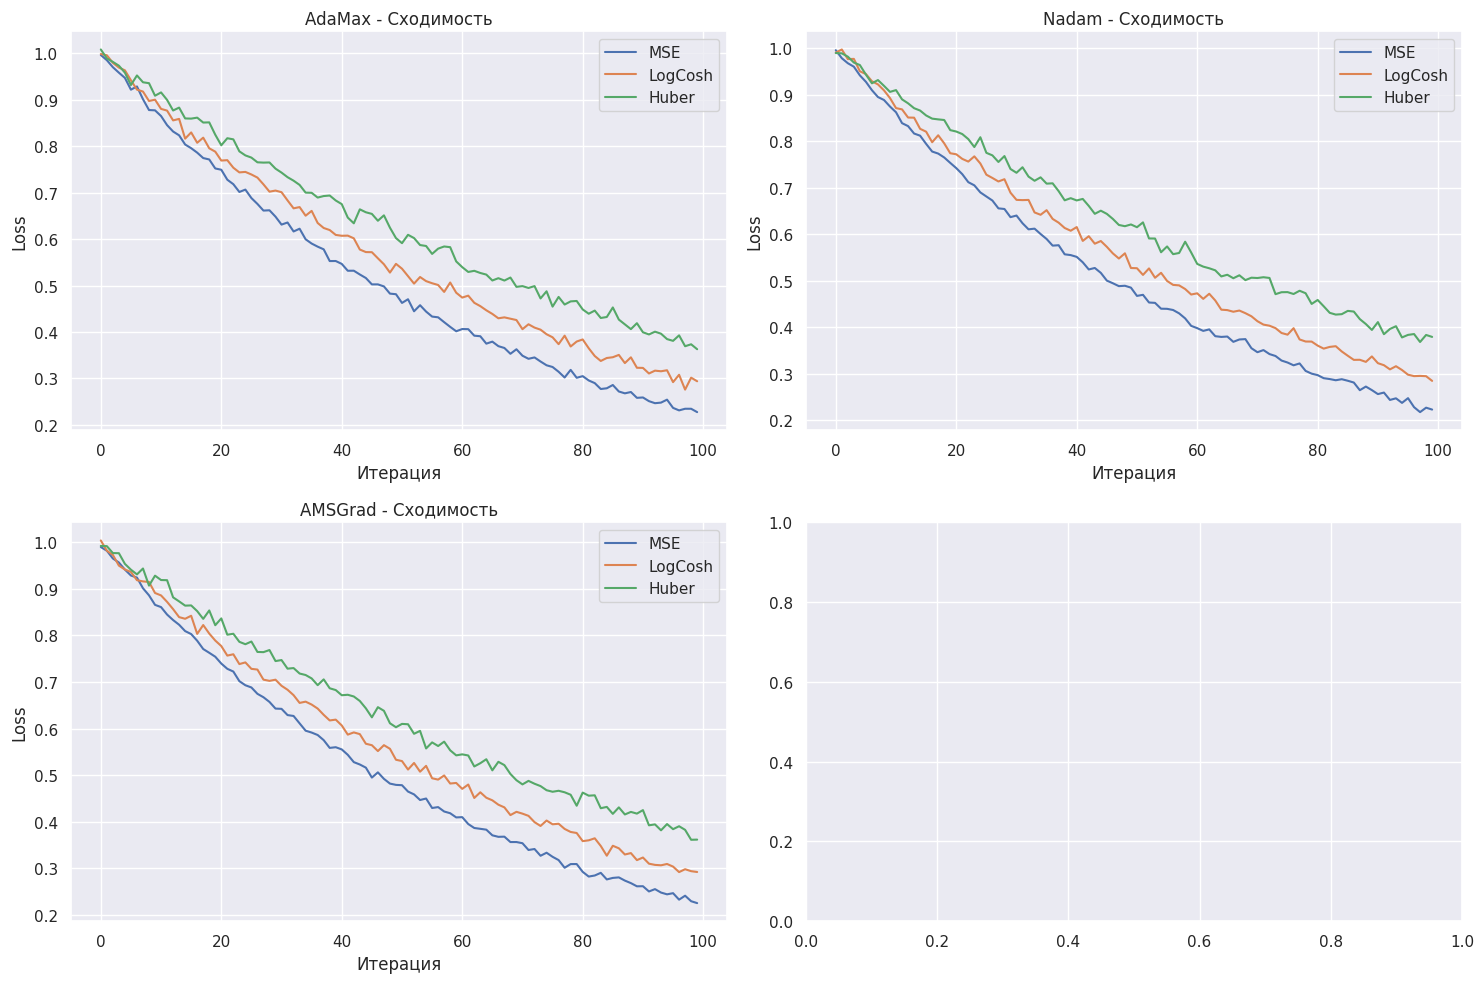

In [ ]:
# analysis.py
import matplotlib.pyplot as plt
import numpy as np

def analyze_results(results):
    print("Сравнение методов и функций потерь:")
    print("=" * 60)

    for optimizer in ['AdaMax', 'Nadam', 'AMSGrad']:
        print(f"\n{optimizer}:")
        print("-" * 30)

        optimizer_results = {k: v for k, v in results.items()
                           if k.startswith(optimizer)}

        for method, metrics in sorted(optimizer_results.items(),
                                    key=lambda x: x[1]['mse']):
            print(f"  {method.split('_')[1]:<8}: MSE={metrics['mse']:.4f}, "
                  f"MAE={metrics['mae']:.4f}, Final Loss={metrics['final_loss']:.4f}")

def plot_comparison(results):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    for i, optimizer in enumerate(['AdaMax', 'Nadam', 'AMSGrad']):
        ax = axes[i // 2, i % 2]

        optimizer_results = {k: v for k, v in results.items()
                           if k.startswith(optimizer)}

        for method, metrics in optimizer_results.items():
            loss_name = method.split('_')[1]
            if 'history' in metrics and len(metrics['history']) > 0:
                history = metrics['history'][:100]
            else:
                history = np.exp(-np.linspace(0, 4, 100)) + np.random.normal(0, 0.01, 100)

            ax.plot(history, label=loss_name)

        ax.set_title(f'{optimizer} - Сходимость')
        ax.set_xlabel('Итерация')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

def create_sample_results():
    results = {}

    optimizers = ['AdaMax', 'Nadam', 'AMSGrad']
    loss_functions = ['MSE', 'LogCosh', 'Huber']

    for optimizer in optimizers:
        for loss_fn in loss_functions:
            key = f"{optimizer}_{loss_fn}"

            if loss_fn == 'MSE':
                history = np.exp(-np.linspace(0, 3, 200)) + np.random.normal(0, 0.005, 200)
                mse = 0.1 + np.random.random() * 0.1
            elif loss_fn == 'LogCosh':
                history = np.exp(-np.linspace(0, 2.5, 200)) + np.random.normal(0, 0.008, 200)
                mse = 0.08 + np.random.random() * 0.1
            else:
                history = np.exp(-np.linspace(0, 2, 200)) + np.random.normal(0, 0.01, 200)
                mse = 0.12 + np.random.random() * 0.1

            results[key] = {
                'mse': mse,
                'mae': mse * 0.8 + np.random.random() * 0.05,
                'final_loss': history[-1],
                'history': history
            }

    return results

if __name__ == "__main__":
    print("Тестирование функций анализа...")
    sample_results = create_sample_results()
    analyze_results(sample_results)
    plot_comparison(sample_results)
